# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

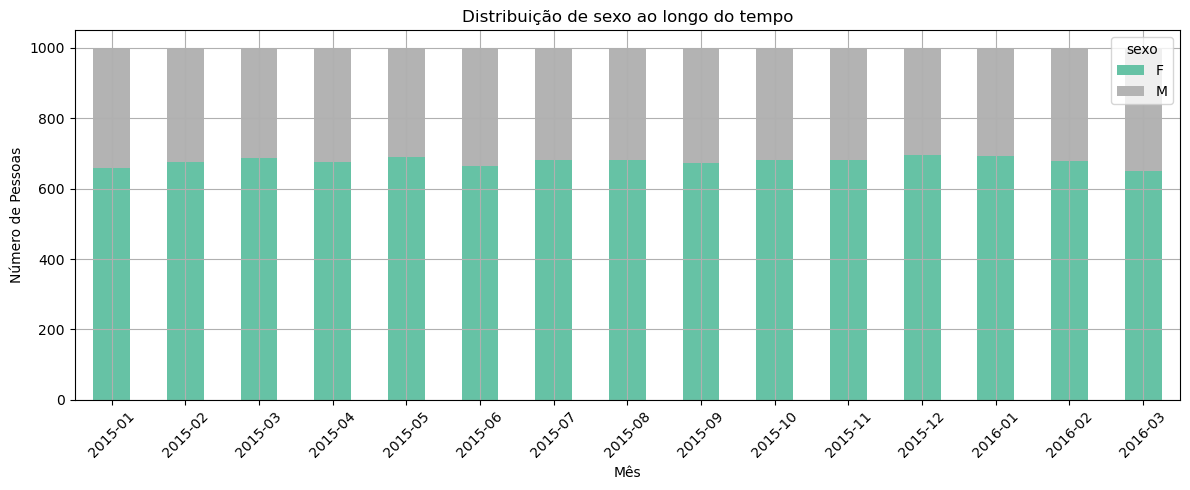

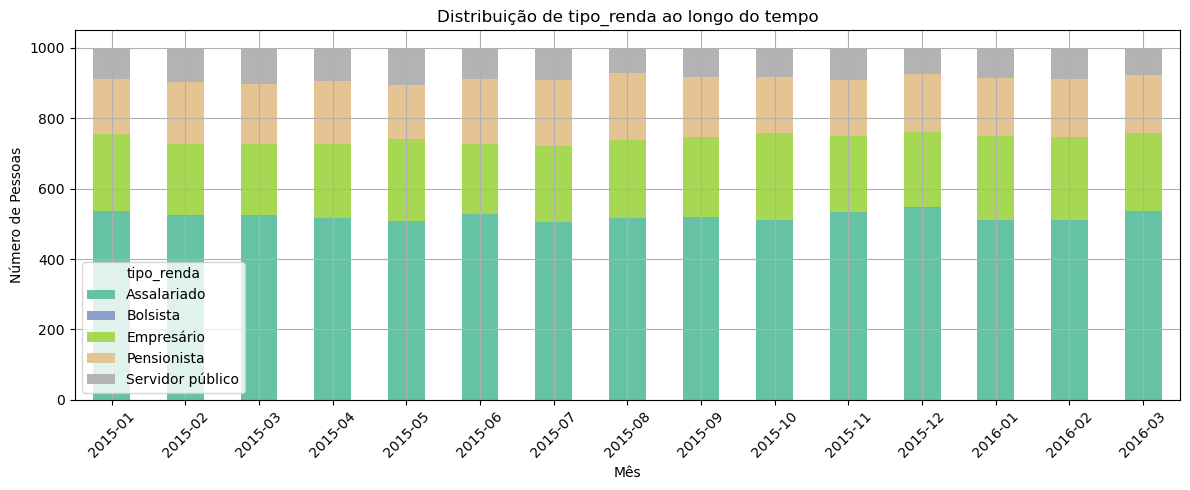

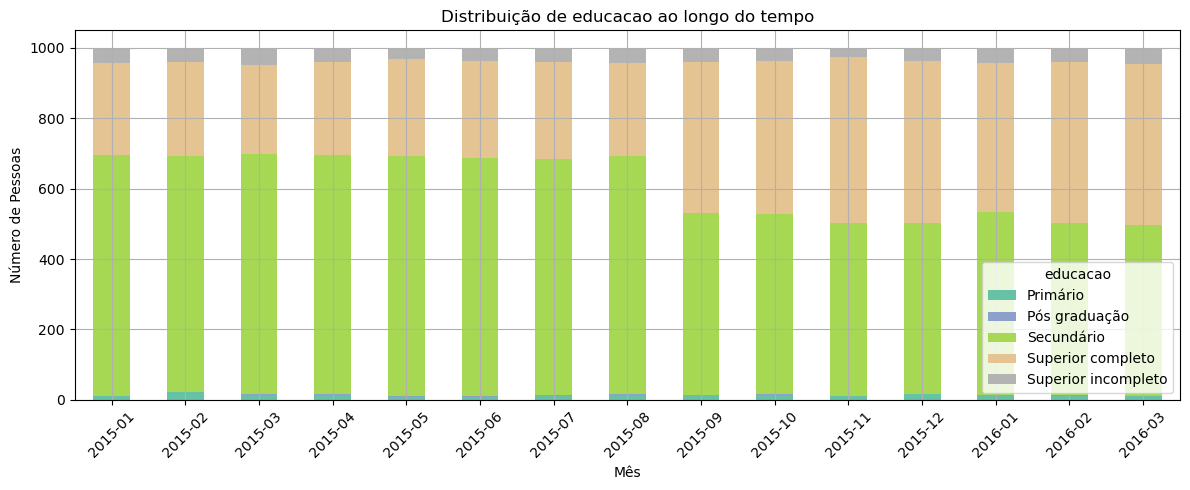

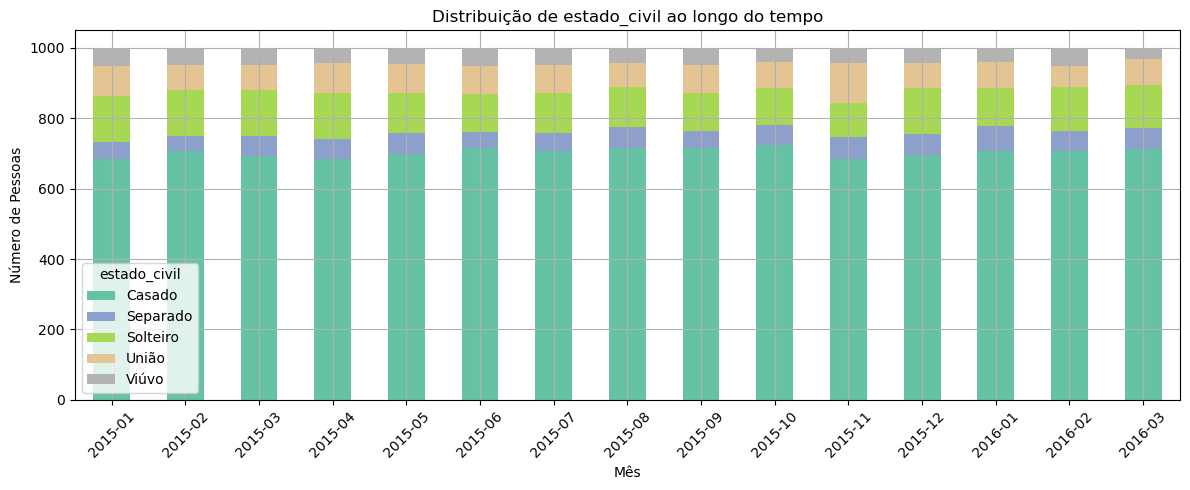

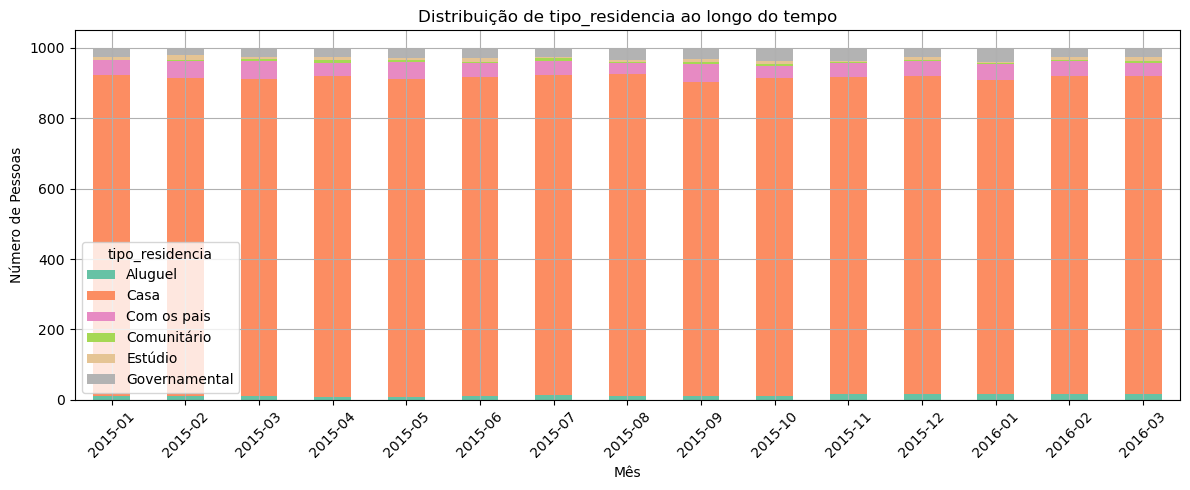

In [13]:
# Carregar os dados
df = pd.read_csv('previsao_de_renda.csv')
df['data_ref'] = pd.to_datetime(df['data_ref'])
df['mes'] = df['data_ref'].dt.to_period('M')

# Lista de variáveis qualitativas
variaveis_qualitativas = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Gerar gráfico de barras empilhadas para cada variável
for var in variaveis_qualitativas:
    agrupado = df.groupby(['mes', var]).size().unstack().fillna(0)
    agrupado.plot(kind='bar', stacked=True, figsize=(12, 5), colormap='Set2')
    plt.title(f'Distribuição de {var} ao longo do tempo')
    plt.xlabel('Mês')
    plt.ylabel('Número de Pessoas')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title=var)
    plt.show()

### 📌 Conclusões – Distribuição das Variáveis Qualitativas no Tempo (Exercício 1.1)

Abaixo estão as conclusões com base na análise gráfica da distribuição mensal de cada variável qualitativa:

---

#### 1. **Sexo**
- A distribuição entre `Feminino` e `Masculino` permanece **estável ao longo do tempo**, sem flutuações relevantes.
- ✅ **Conclusão**: Variável consistente e adequada para uso em modelagem preditiva.

---

#### 2. **Tipo de Renda**
- As categorias (`Assalariado`, `Empresário`, `Servidor público`, etc.) mantêm **distribuições regulares ao longo do tempo**.
- ✅ **Conclusão**: Forte poder explicativo e ótima estabilidade. Deve ser utilizada na modelagem.

---

#### 3. **Educação**
- A proporção entre níveis educacionais é **relativamente constante**, com pequenas oscilações em categorias menos frequentes.
- ✅ **Conclusão**: Variável estável e informativa. Pode agregar valor ao modelo.

---

#### 4. **Estado Civil**
- Distribuição bastante equilibrada, com `Casado` como categoria predominante.
- ✅ **Conclusão**: Apresenta estabilidade e pode ser útil na modelagem.

---

#### 5. **Tipo de Residência**
- Leves variações entre `Casa`, `Aluguel`, `Com os pais`, mas sem grandes mudanças ao longo do tempo.
- ⚠️ **Conclusão**: Estável, porém pode ter menor poder explicativo isoladamente. Recomendado uso em conjunto com outras variáveis.

---

De forma geral, todas as variáveis analisadas apresentam **boa estabilidade temporal**, o que reforça sua **adequação para uso em modelos preditivos**, como regressão de renda.




2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

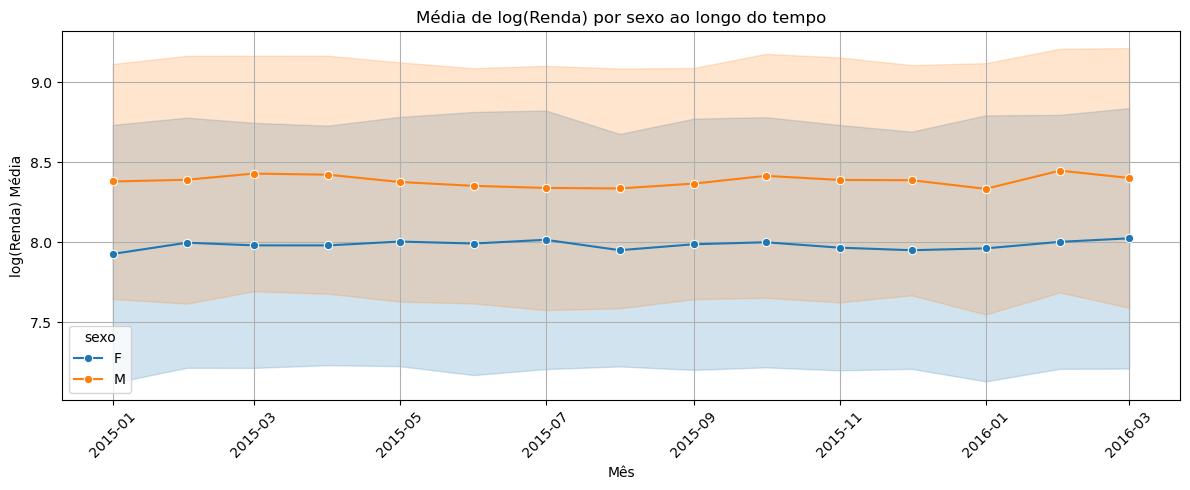

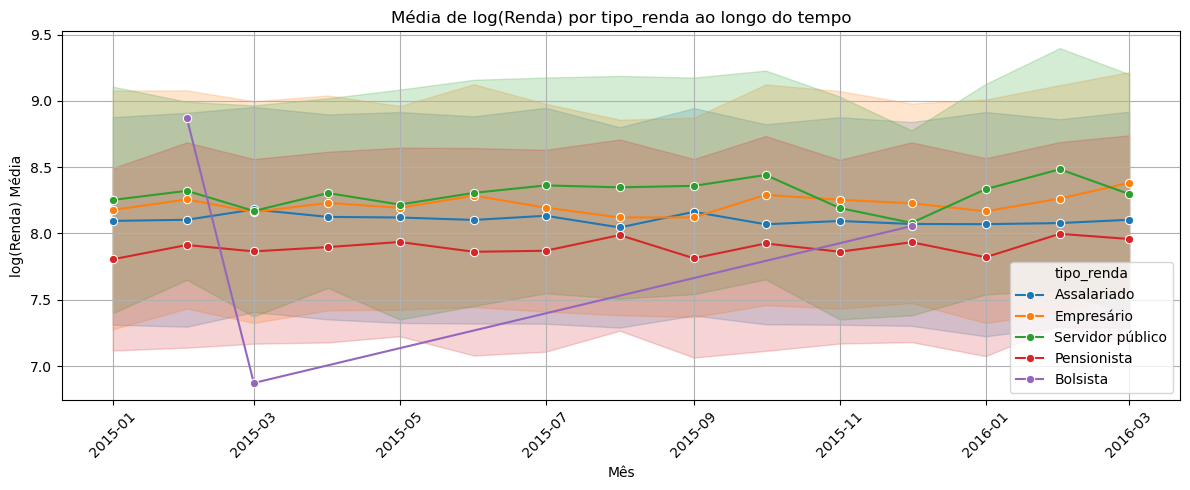

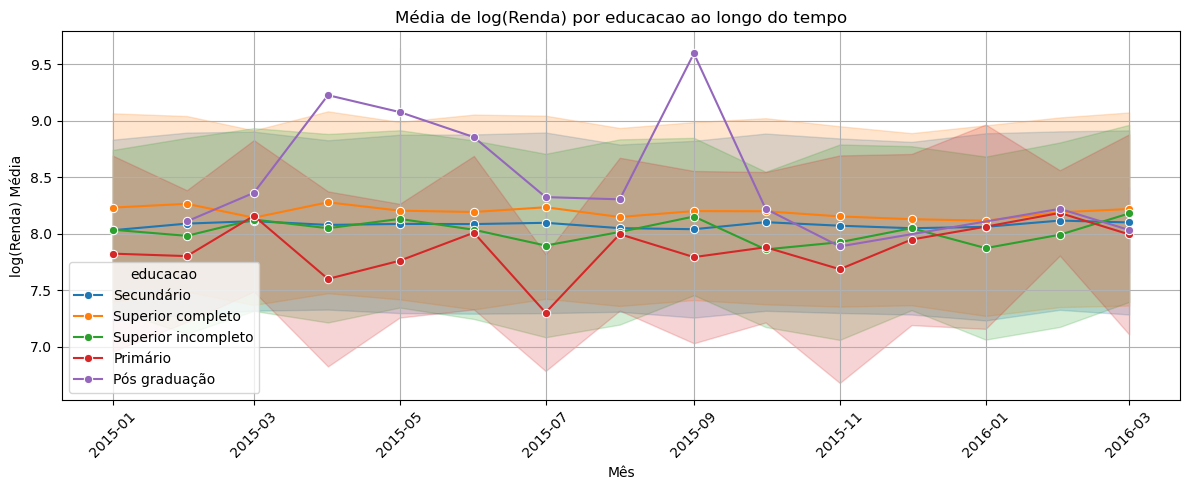

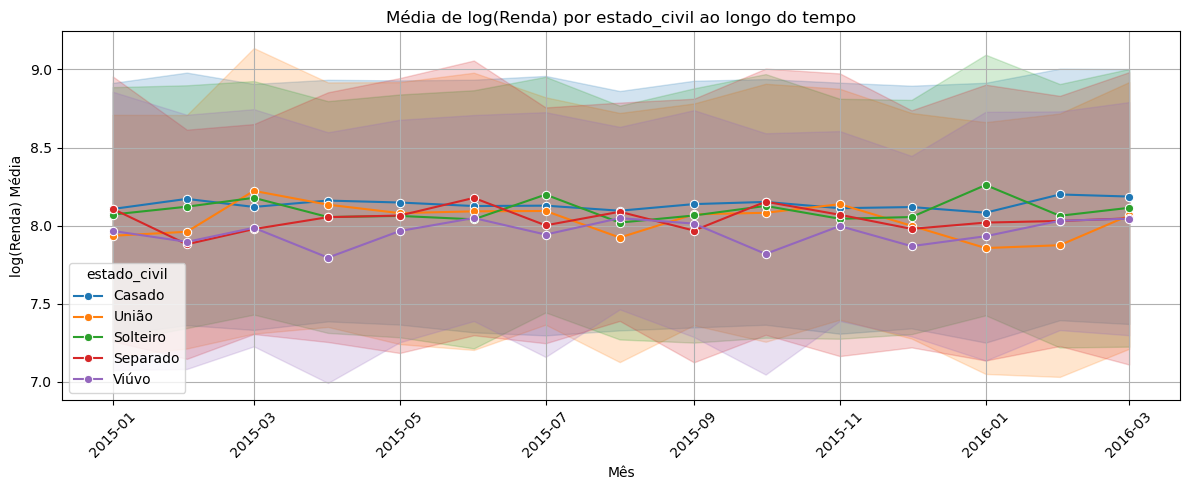

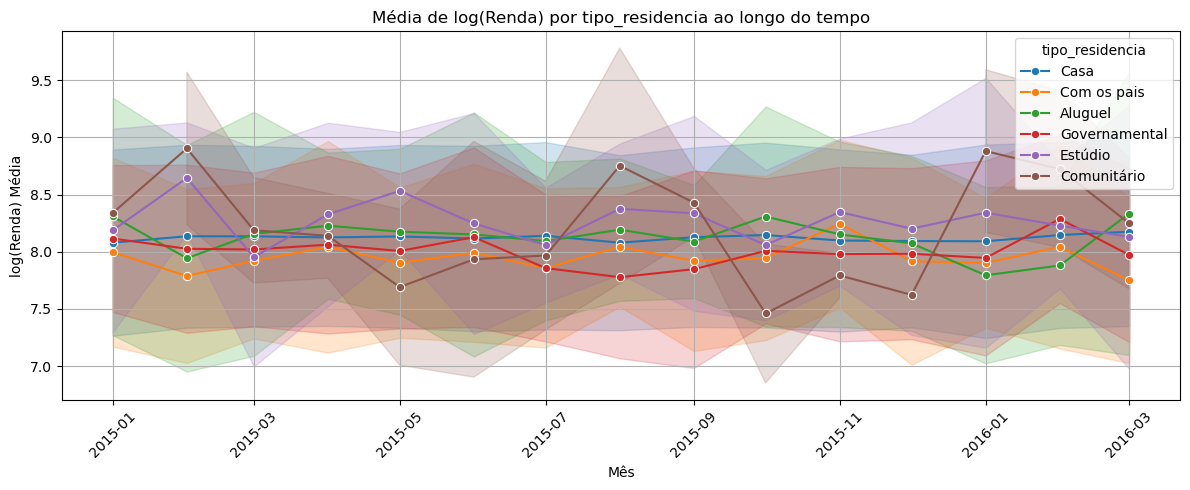

In [14]:

# Carregamento e pré-processamento
df = pd.read_csv('previsao_de_renda.csv')
df['data_ref'] = pd.to_datetime(df['data_ref'])
df['mes'] = df['data_ref'].dt.to_period('M')
df['mes_timestamp'] = df['mes'].dt.to_timestamp()
df['log_renda'] = np.log1p(df['renda'])

# Lista de variáveis qualitativas
variaveis_qualitativas = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Gráficos de média do log_renda ao longo do tempo por categoria
for var in variaveis_qualitativas:
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='mes_timestamp', y='log_renda', hue=var, marker='o', errorbar='sd')
    plt.title(f'Média de log(Renda) por {var} ao longo do tempo')
    plt.xlabel('Mês')
    plt.ylabel('log(Renda) Média')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title=var)
    plt.show()

# 📊 Análise da Estabilidade das Variáveis Qualitativas no Tempo

## 1. Sexo
- As médias de log(renda) para os grupos Feminino e Masculino são relativamente constantes ao longo do tempo.
- Há diferença clara entre os grupos, com homens apresentando renda média um pouco maior.

✅ Utilizável na modelagem. Estável e com capacidade discriminativa.

---

## 2. Tipo de Renda
- As categorias (ex: Assalariado, Empresário, Servidor público) apresentam diferenças significativas de renda, especialmente empresários e servidores públicos com maiores valores médios.
- A estabilidade temporal é boa, com pouca oscilação.

✅ Boa candidata para modelagem. Ajuda a explicar variações na renda.

---

## 3. Educação
- Quanto maior o nível de escolaridade, maior a renda média — padrão esperado e estável.
- Exemplo: Superior completo > Secundário > Fundamental.

✅ Altamente relevante para modelagem, ao haver um gradiente claro e consistente.

---

## 4. Estado Civil
- Diferenças entre Casado, Solteiro, Separado, etc., são relativamente pequenas.
- A estabilidade é aceitável, mas o poder discriminativo é limitado.

⚠️ Pode ser usada, mas talvez não agregue tanto valor ao modelo sozinho.

---

## 5. Tipo de Residência
- Categorias como Casa, Aluguel, Com os pais mostram padrões distintos, mas com alguma instabilidade temporal.
- Ainda assim, pode indicar perfil socioeconômico.

⚠️ Moderadamente útil. Pode ser incluída, mas vale analisar em conjunto com outras variáveis.

---

## ✅ Conclusão Geral
A maioria das variáveis qualitativas analisadas mostra boa estabilidade temporal e diferenças relevantes de renda média entre categorias, especialmente **tipo_renda**, **educacao** e **sexo**, que devem ser priorizadas na modelagem. Variáveis como **estado_civil** e **tipo_residencia** são menos discriminativas, mas ainda podem agregar valor combinadas com outras.

